# Calculando o Beta de uma ação

Beta é a relção entre uma ação e o próprio mercado.

**Beta:**

- Regressão do Retorno da Ação Vs Retorno do Mercado

**Regressão Linear:**

- Você tentar explicar uma a variação de uma variavel, dada a variação de outra. É uma técnica estatística, que tenta encontrar a relação entre variáveis

**Retorno do mercado:**
- Normalmente é o índice do mercado. (No Brasil, por exemplo pode ser o IBOVESPA ou o IBX100). O Beta do mercado, por definição é 1.
- Para criptomoedas, o Retorno do Mercado normalmente é embasado pelo Bitcoin

**Exemplo de interpretação:**

- Ação de Beta 2
- Mercado subiu 10%
- Então a ação sobe 20%

O Beta é uma medida de risco. Risco, por definição acadêmica, é volatilidade. É um conceito de Factor Investing.

**Cuidado com Relações Espúrias:**
- Uma relação espúria é uma correlação aparente entre duas variáveis que não têm uma relação causal real.
- Exemplo: Quando chove em Nova York, o Bitcoin sobe 2% (Freakonomics)

**Fórmula Regressão Linear:**

Y = α + βX + e

- Y = Variável Resposta (Ativo)
- α = Intecepto constante (valor de Y quando o 𝑋i é zero)
- X = Variável Explicativa (Base [BTC/IBOV])
- β = Beta. Coeficiente angular de inclinação da reta
- e = Erro


In [75]:
import yfinance as yf 
import statsmodels.api as sm 
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

TICKER_ANALISADO = 'ITUB4.SA'


In [59]:
# Lista de tickers das principais empresas do Ibovespa
tickers = [
    '^BVSP', 'WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 
    'BBDC3.SA', 'BBDC4.SA', 'ABEV3.SA', 'MGLU3.SA', 'B3SA3.SA', 'BBAS3.SA', 
    'SUZB3.SA', 'ELET3.SA', 'ELET6.SA', 'GGBR4.SA', 'RENT3.SA', 'RAIL3.SA', 
    'BPAC11.SA', 'NTCO3.SA', 'CXSE3.SA'
]

# Definir intervalo de datas
final_date = datetime.now()  # Hoje
start_date = final_date - timedelta(days=365 * 3)  # Últimos 3 anos

# Baixar dados do Yahoo Finance
stock_data = yf.download(tickers, start=start_date, end=final_date)['Close']

# Exibir os dados
stock_data;

[*********************100%***********************]  20 of 20 completed


In [60]:
# Calcula os retornos diários

daily_return = stock_data.pct_change().dropna()

daily_return;

In [76]:
# Calculamos o Beta usando Ordinary Least Squares

# Y = daily_return['WEGE3.SA']
Y = daily_return[TICKER_ANALISADO]
X = daily_return['^BVSP']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

# Beta
print(f'Beta = {model.params.iloc[1]}')
print(f'R Quadrado = {model.rsquared}')
print('---------------------')
print(str(model.summary()))


Beta = 0.9409220209796445
R Quadrado = 0.5230436055072731
---------------------
                            OLS Regression Results                            
Dep. Variable:               ITUB4.SA   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     818.1
Date:                Sat, 08 Mar 2025   Prob (F-statistic):          4.77e-122
Time:                        19:36:43   Log-Likelihood:                 2395.8
No. Observations:                 748   AIC:                            -4788.
Df Residuals:                     746   BIC:                            -4778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

### O que é Ordinary Least Squares (OLS)?
**Ordinary Least Squares (OLS)**, ou **Mínimos Quadrados Ordinários** em português, é um método estatístico usado para estimar os coeficientes de um modelo de regressão linear. A ideia principal do OLS é encontrar a melhor linha reta que descreve a relação entre uma variável dependente (\( Y \)) e uma ou mais variáveis independentes (\( X \)) minimizando a soma dos **quadrados dos erros** (as diferenças entre os valores observados e os valores previstos pelo modelo).

No seu caso, você está usando OLS para calcular o **Beta** da ação **WEGE3** em relação ao índice **Ibovespa (^BVSP)**. Esse Beta representa o quanto a ação tende a variar em resposta às variações do índice.

---

**O que é \( R^2 \) e como interpretá-lo?**

O **\( R^2 \) (R Quadrado)**, ou **Coeficiente de Determinação**, mede a **proporção da variabilidade da variável dependente (\( Y \)) que é explicada pela variável independente (\( X \))**.

- Ele varia de **0 a 1**:
  - **\( R^2 = 0 \)** significa que o modelo **não explica nada** da variação de \( Y \).
  - **\( R^2 = 1 \)** significa que o modelo **explica 100%** da variação de \( Y \).
  - **Valores intermediários** indicam o quanto do comportamento de \( Y \) pode ser previsto com base em \( X \).

**No seu resultado:**
- **\( R^2 = 0.170 \)** → Isso significa que **apenas 17% da variação diária da ação WEGE3 pode ser explicada pelas variações diárias do Ibovespa**.
- Isso indica que, embora exista uma relação entre o Ibovespa e a WEGE3, há outros fatores influenciando essa ação que não estão sendo considerados no modelo.

---

**Resumo da Interpretação**
1. **OLS** é um método de regressão linear que encontra a melhor linha que minimiza os erros entre valores reais e previstos.
2. **O Beta de 0.6936** significa que, para cada 1% de variação no Ibovespa, a **WEGE3 tende a variar cerca de 0.69%**.
3. **\( R^2 = 0.17 \)** significa que apenas **17% da variação diária da WEGE3 pode ser explicada pelo Ibovespa**, sugerindo que existem outros fatores relevantes que impactam essa ação além do índice.



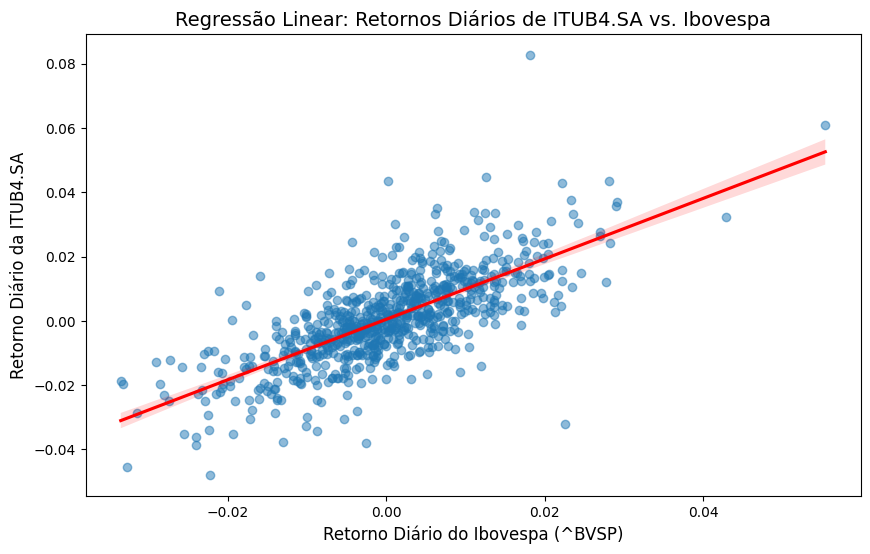

In [77]:
ticker_y = TICKER_ANALISADO

# Valores previstos pelo modelo
X_values = daily_return['^BVSP']
Y_values = daily_return[ticker_y]

# Criando o scatter plot
plt.figure(figsize=(10,6))
sns.regplot(x=X_values, y=Y_values, line_kws={'color':'red'}, scatter_kws={'alpha':0.5})

# Títulos e rótulos
plt.title(f'Regressão Linear: Retornos Diários de {ticker_y} vs. Ibovespa', fontsize=14)
plt.xlabel("Retorno Diário do Ibovespa (^BVSP)", fontsize=12)
plt.ylabel(f'Retorno Diário da {ticker_y}', fontsize=12)

# Exibir o gráfico
plt.show()


### Como interpretar o gráfico?

- **Pontos dispersos**: Representam os retornos diários da **WEGE3** em relação aos retornos do **Ibovespa**.

- **Linha vermelha (reta de regressão)**: Mostra a **tendência** da relação entre os retornos da ação e do índice.
  - Se a linha estiver **inclinada positivamente** → WEGE3 sobe quando o Ibovespa sobe.
  - Se a linha estiver **inclinada negativamente** → WEGE3 cai quando o Ibovespa sobe (o que não é o caso aqui, pois o **Beta é positivo**).

- **A dispersão dos pontos em relação à linha**:
  - Se os pontos estiverem **muito espalhados**, o modelo não explica bem a relação entre as variáveis (o que é indicado pelo **\( R^2 \) baixo, como 0.17 no seu caso**).
  - Se os pontos estiverem **mais próximos da linha**, a relação entre o índice e a ação é mais forte.

Esse gráfico ajuda a visualizar **como a ação reage às oscilações do Ibovespa** e se existe uma relação linear clara entre eles. 🚀


## Cálculando o Beta para várias ações

In [ ]:
# Calculamos o Beta usando Ordinary Least Squares

Y = daily_return['^BVSP']
X = daily_return['^BVSP']
X = sm.add_constant(X)

models = []

for ticker in tickers:
    Y = daily_return[ticker]
    models.append([str(ticker), sm.OLS(Y, X).fit()])

# for model in models:
#     print(f'{model[0]}')
#     print(f'Beta = {model[1].params.iloc[1]}')
#     print(f'R Quadrado = {model[1].rsquared}')

# Criar uma lista para armazenar os resultados
results_list = []

# Preencher a lista com os valores calculados
for model in models:
    results_list.append({
        'Ticker': model[0],
        'Beta': model[1].params.iloc[1],
        'R Quadrado': model[1].rsquared
    })

# Converter a lista para DataFrame e concatenar corretamente
results_df = pd.concat([pd.DataFrame([row]) for row in results_list], ignore_index=True)


results_df

,Ticker,Beta,R Quadrado
0,^BVSP,1.000000,1.000000
1,WEGE3.SA,0.693640,0.170079
2,VALE3.SA,0.893763,0.285036
3,PETR4.SA,1.005723,0.283658
4,ITUB4.SA,0.940922,0.523044
5,BBDC3.SA,1.008439,0.442586
6,BBDC4.SA,1.073535,0.399704
7,ABEV3.SA,0.605795,0.227843
8,MGLU3.SA,2.306971,0.291769
9,B3SA3.SA,1.458062,0.501440
